<a href="https://colab.research.google.com/github/daksh-2212/Projects/blob/main/Apple_stockpredictionusing_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import array 
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [ ]:
df=pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-12-2020,125.019997,128.309998,123.449997,128.229996,127.444336,121251600
1,22-12-2020,131.610001,134.410004,129.649994,131.880005,131.071976,168904800
2,23-12-2020,132.160004,132.429993,130.779999,130.960007,130.157623,88223700
3,24-12-2020,131.320007,133.460007,131.100006,131.970001,131.161407,54930100
4,28-12-2020,133.990005,137.339996,133.509995,136.690002,135.852509,124486200


In [ ]:
df.shape

(252, 7)

In [ ]:
df1=df.reset_index()['Close'];df1

0      128.229996
1      131.880005
2      130.960007
3      131.970001
4      136.690002
          ...    
247    174.330002
248    179.300003
249    172.259995
250    171.139999
251    169.809998
Name: Close, Length: 252, dtype: float64

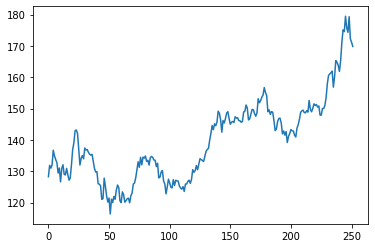

In [ ]:
plt.plot(df1);plt.show()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[0.18814385],
       [0.24599786],
       [0.23141555],
       [0.24742433],
       [0.32223811],
       [0.29339032],
       [0.27516248],
       [0.25883661],
       [0.20684742],
       [0.23220788],
       [0.16230778],
       [0.23078139],
       [0.24869239],
       [0.20003163],
       [0.19717868],
       [0.2303059 ],
       [0.19892223],
       [0.17086699],
       [0.1818038 ],
       [0.24837532],
       [0.32509107],
       [0.35996208],
       [0.42098587],
       [0.42479006],
       [0.40735455],
       [0.32857816],
       [0.24726592],
       [0.28181961],
       [0.29529252],
       [0.27864958],
       [0.33333332],
       [0.32334752],
       [0.32572522],
       [0.31145974],
       [0.30163258],
       [0.29751157],
       [0.3013155 ],
       [0.2667618 ],
       [0.22951333],
       [0.21160258],
       [0.21413845],
       [0.15279758],
       [0.15057855],
       [0.14249481],
       [0.07338718],
       [0.07766685],
       [0.18116977],
       [0.138

In [ ]:
# splitting dataset into train and test split
training_size=int (len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]
print(training_size,test_size)

163 89


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(ytest.shape)

(62, 100, 1)
(62,)
(0,)
(0,)


(None, None, None, None)

In [ ]:
# creating the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

                                                          


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
